# 01 Open NetCDF file (ERA5 reanalysis)

In this notebook, I will quickly demonstrate how we can:

- open a netcdf file (ERA5 reanalysis) 
- export a value from the NetCDF file into the CSV file

There are a number of Python libraries to open and process the NetCDF files such as xarray, netCDF4. 
- the netCDF4
- xarray (other tutorial video)

Please refer to the following about the python libraries if interested.

Useful links:
http://xarray.pydata.org/en/stable/
https://unidata.github.io/netcdf4-python/netCDF4/index.html

Here is the link to download the data that I am using in this notebook
https://drive.google.com/open?id=18sG05s6kOE3N5ta1ChcheLxVQlUQw1Iq

Acknowledgement:
https://www.ecmwf.int/en/forecasts/datasets/reanalysis-datasets/era5

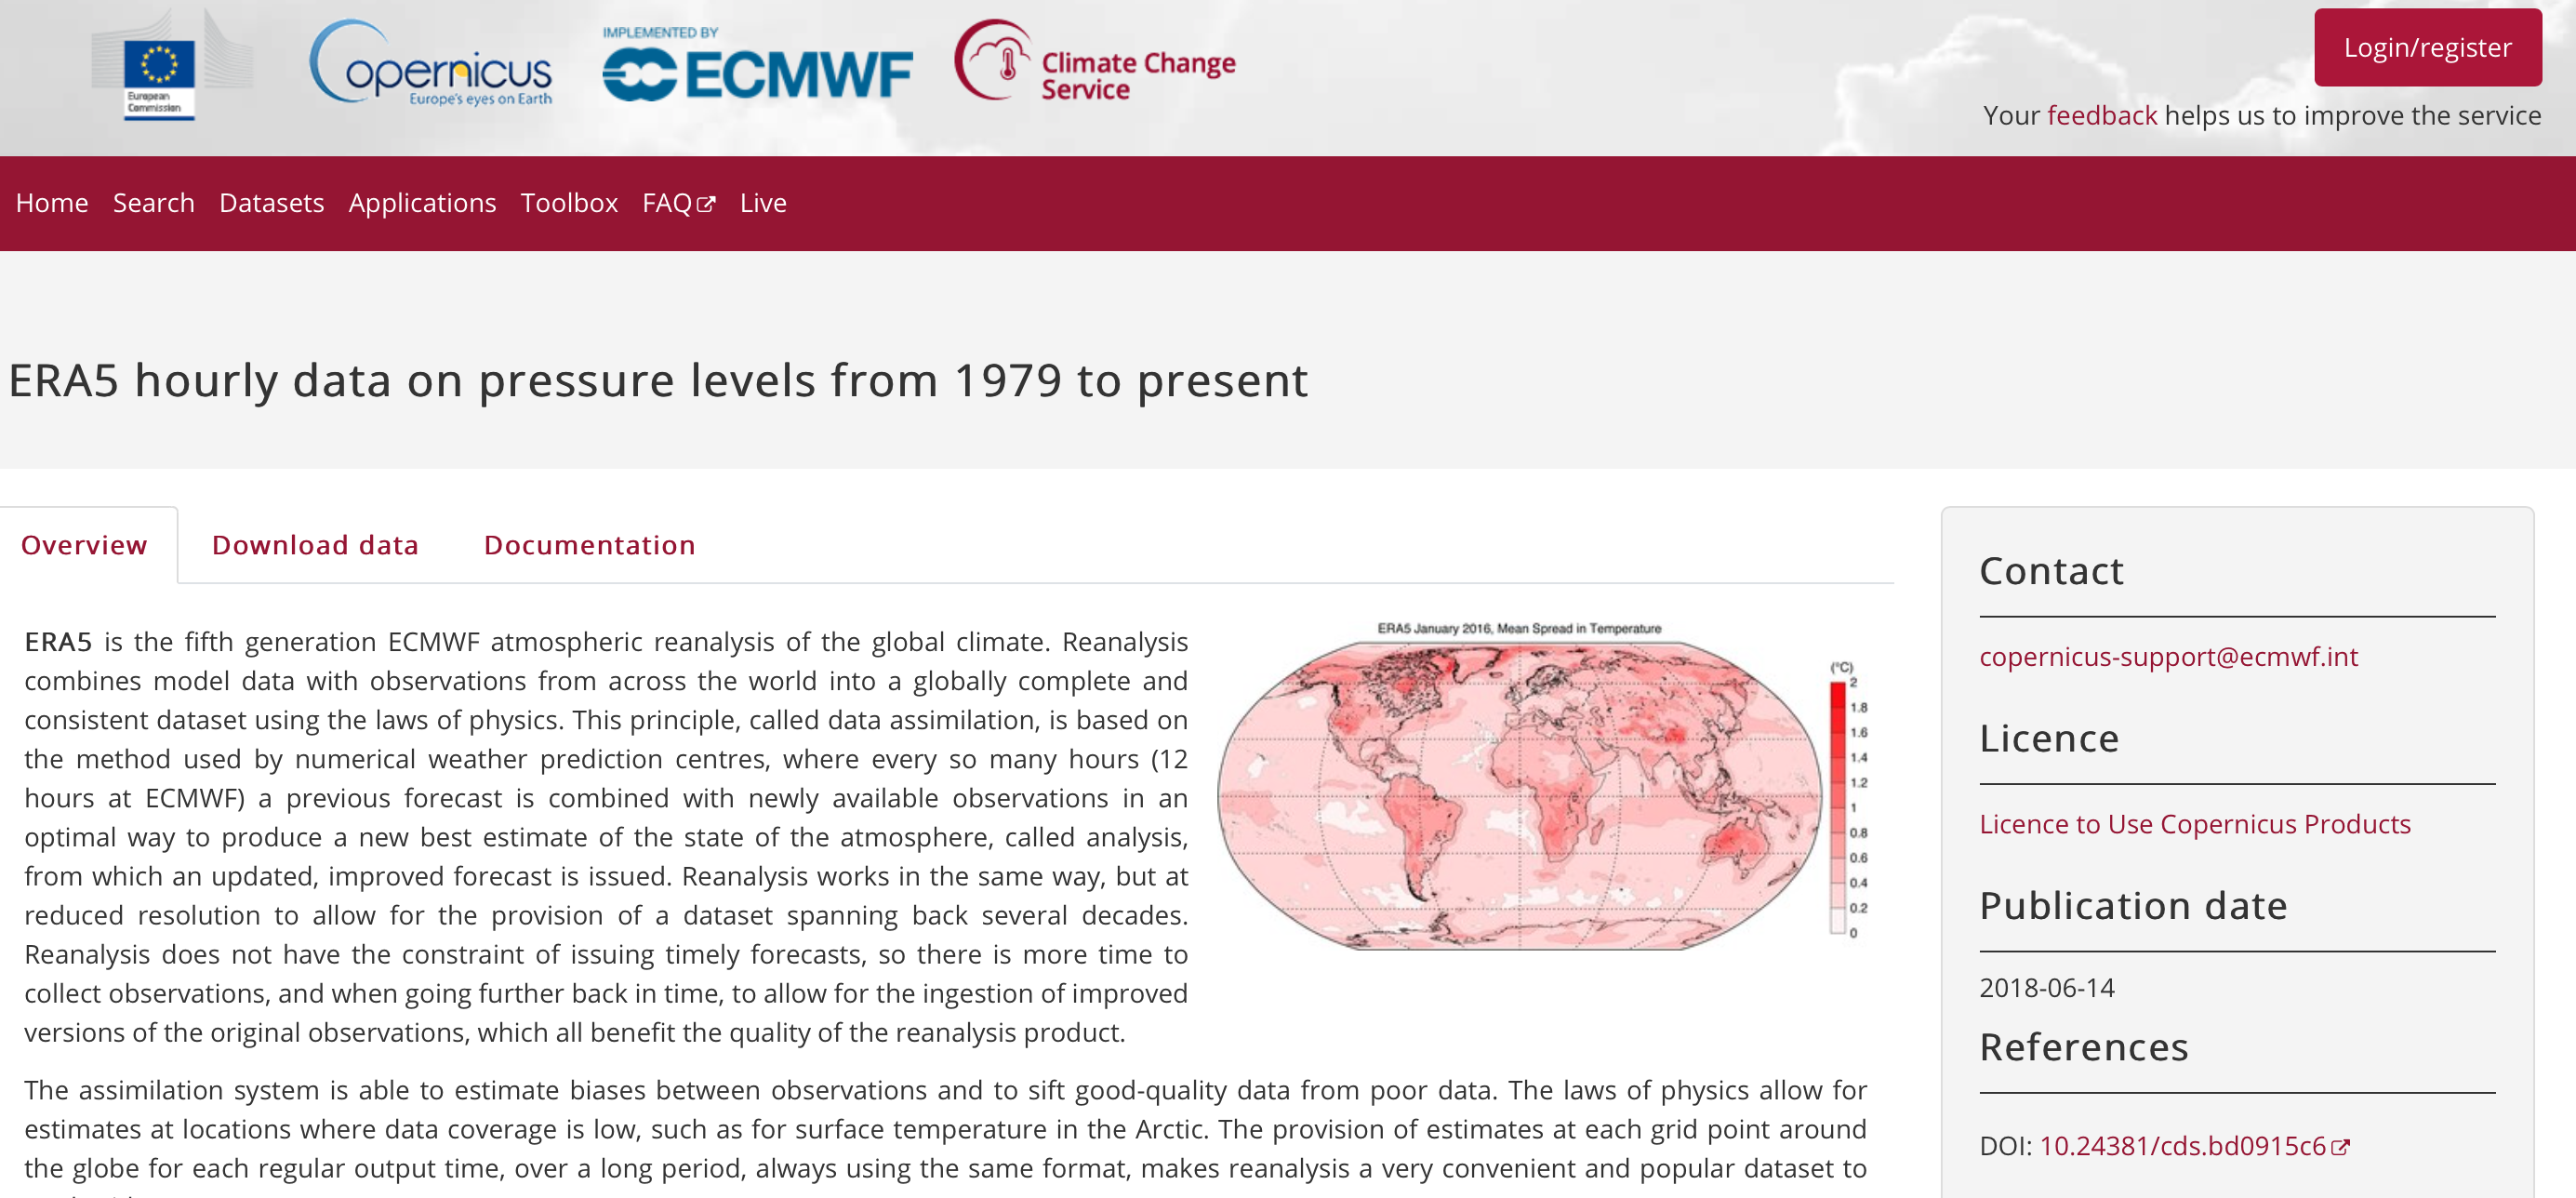

In [1]:
from IPython.display import Image
Image('01_era5_ecmwf.png')

In [ ]:
#Ok !!! Now started !!!!

In [1]:
# first import libraries
import netCDF4 as nc
import numpy as np
import pandas as pd
print('all libraries are loaded')

all libraries are loaded


In [2]:
# specify where is the location of the data
path_in = "data/"
path_out = "./"

In [3]:
# open the data
df = nc.Dataset(path_in + 'ERA5_reanalysis.nc')

In [4]:
# look at the data to see what it is
print(df)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2020-03-20 00:22:45 GMT by grib_to_netcdf-2.16.0: /opt/ecmwf/eccodes/bin/grib_to_netcdf -S param -o /cache/data2/adaptor.mars.internal-1584663762.9685905-23199-34-0e48a986-23ab-4f27-a5c4-2f3a006314b0.nc /cache/tmp/0e48a986-23ab-4f27-a5c4-2f3a006314b0-adaptor.mars.internal-1584663762.9691193-23199-7-tmp.grib
    dimensions(sizes): longitude(1440), latitude(721), level(10), time(2)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 level(level), int32 time(time), int16 r(time,level,latitude,longitude), int16 t(time,level,latitude,longitude), int16 u(time,level,latitude,longitude), int16 v(time,level,latitude,longitude)
    groups: 


In [5]:
# print to see what variables it has
print(df.variables)

{'longitude': <class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    units: degrees_east
    long_name: longitude
unlimited dimensions: 
current shape = (1440,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'latitude': <class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    units: degrees_north
    long_name: latitude
unlimited dimensions: 
current shape = (721,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'level': <class 'netCDF4._netCDF4.Variable'>
int32 level(level)
    units: millibars
    long_name: pressure_level
unlimited dimensions: 
current shape = (10,)
filling on, default _FillValue of -2147483647 used, 'time': <class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: hours since 1900-01-01 00:00:00.0
    long_name: time
    calendar: gregorian
unlimited dimensions: 
current shape = (2,)
filling on, default _FillValue of -2147483647 used, 'r': <class 'netCDF4._netCDF4.Variable'>
int16 r(time, level, latitude, l

In [6]:
# print to see what dimensions the NetCDF has
print(df.dimensions)

{'longitude': <class 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 1440, 'latitude': <class 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 721, 'level': <class 'netCDF4._netCDF4.Dimension'>: name = 'level', size = 10, 'time': <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 2}


In [7]:
# extract the temperature from the data
temp = df.variables['t']

In [8]:
# print the temperature variable
print(temp)

<class 'netCDF4._netCDF4.Variable'>
int16 t(time, level, latitude, longitude)
    scale_factor: 0.0018819251566988436
    add_offset: 251.852048234199
    _FillValue: -32767
    missing_value: -32767
    units: K
    long_name: Temperature
    standard_name: air_temperature
unlimited dimensions: 
current shape = (2, 10, 721, 1440)
filling on


In [9]:
# print to the shape of the temperature array
print(temp.shape)

(2, 10, 721, 1440)


In [10]:
# pick a temperature value at one grid point (1 time step, all vertical levels)
new_temp = temp[0,:,90,500]

In [11]:
# print to see what it has
print(new_temp)

[262.94787896 231.59500585 193.7457271  202.00361468 205.45694735
 220.11902624 235.73335927 243.77858931 248.20111343 251.30252609]


In [12]:
print(np.round(new_temp,2))

[262.95 231.6  193.75 202.   205.46 220.12 235.73 243.78 248.2  251.3 ]


In [13]:
print(new_temp.shape)

(10,)


the shape of temperature array is 10 which is corresponding to the number of vertical level

# Now we will export this temperature array to CSV file

In [14]:
# just index
ind            = np.arange(0, len(new_temp))
# make a Python dictionary
our_dictionary = {'ind' : ind, 'temp': np.round(new_temp,2)}
df_out         = pd.DataFrame(our_dictionary, columns=['ind', 'temp'])
# export to CSV
export_csv     = df_out.to_csv(path_out +'temperature.csv', index=None, header=True)

# Now we will open this CSV file again

In [16]:
# Open the CSV file
df_csv = pd.read_csv(path_out + 'temperature.csv')

In [17]:
print(df_csv)

   ind    temp
0    0  262.95
1    1  231.60
2    2  193.75
3    3  202.00
4    4  205.46
5    5  220.12
6    6  235.73
7    7  243.78
8    8  248.20
9    9  251.30


# All done !!!

- Please feel free to let me know if there is any analysis that you would like me to do or instruct
- Please subscribe my youtube too
- Thank you very much